Abyanandi Zaintama

H8 DSFT Batch 1

**MILESTONE 1 PHASE 2**

| Columns | Details |
| :- | :- |
|Customer ID| ID of the customer |
| gender | Whether the customer is a male or a female|
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup |Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport| Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV |Whether the customer has streaming TV or not (Yes, No, No internet service)|
| StreamingMovies |Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract | The contract term of the customer (Month-to-month, One year, Two year)|
| PaperlessBilling |Whether the customer has paperless billing or not (Yes, No)|
| PaymentMethod |The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
| MonthlyCharges | The amount charged to the customer monthly|
| TotalCharges | The total amount charged to the customer|
| Churn | Whether the customer churned or not (Yes or No)|

# Importing Module

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder, LabelEncoder,OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score,cross_val_predict, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced 
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.impute import SimpleImputer
import plotly.express as px

from sklearn.pipeline import make_pipeline,Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [105]:
df = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Convert TotalCharges column data types to float**

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Convert SeniorCitizen column data types to object**

In [11]:
#df.astype({'SeniorCitizen': 'object'}).dtypes
df["SeniorCitizen"] = df.SeniorCitizen.astype(object)
#df['SeniorCitizen'].convert_dtypes()
#df['SeniorCitizen'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# EDA

In [14]:
num_cols = df.select_dtypes(exclude=  ['object']).columns.tolist()
cat_cols  = df.select_dtypes(include = ['object']).columns.tolist()

In [15]:
print(num_cols)
print(cat_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [16]:
df[num_cols].corr(method='pearson')

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


<AxesSubplot:>

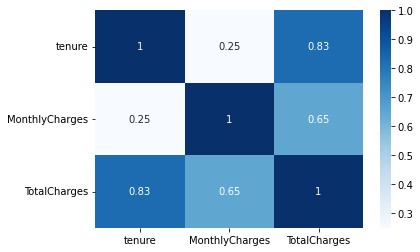

In [17]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Blues')

From the correlation heatmap, there isn't any insight that we could get. We will see each column in numeric and categorical data types

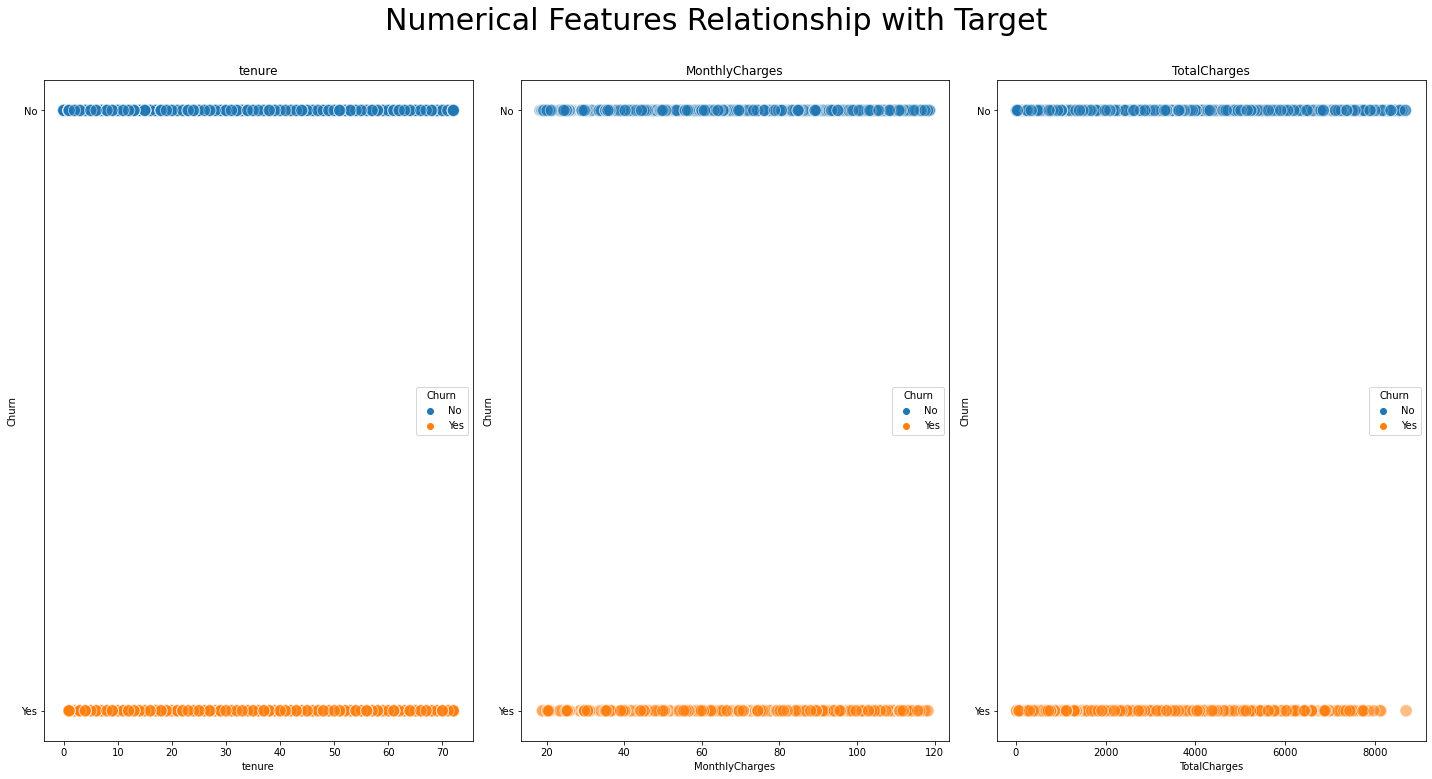

In [18]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Relationship with Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.scatterplot(
        x = df[num_cols[i]],
        y = df['Churn'], hue = df['Churn'],
         s = 150, alpha = 0.5
    )
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

Checking distribution of the numeric data

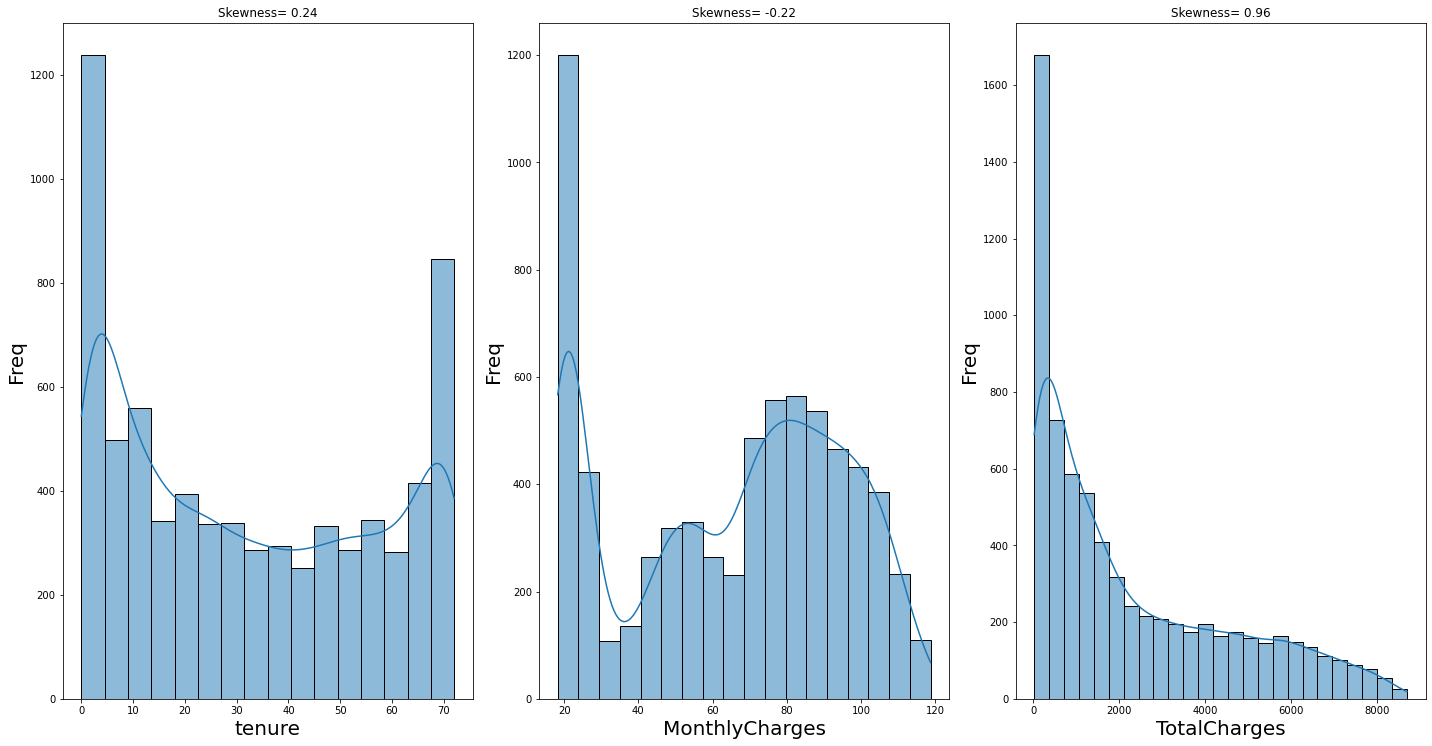

In [19]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.histplot(
        df[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df[num_cols[i]].skew(),2))}")
plt.tight_layout()
plt.show()

From the graph, we can see that the TotalCharges distribution is skewed. But the 2 others is not that skewed

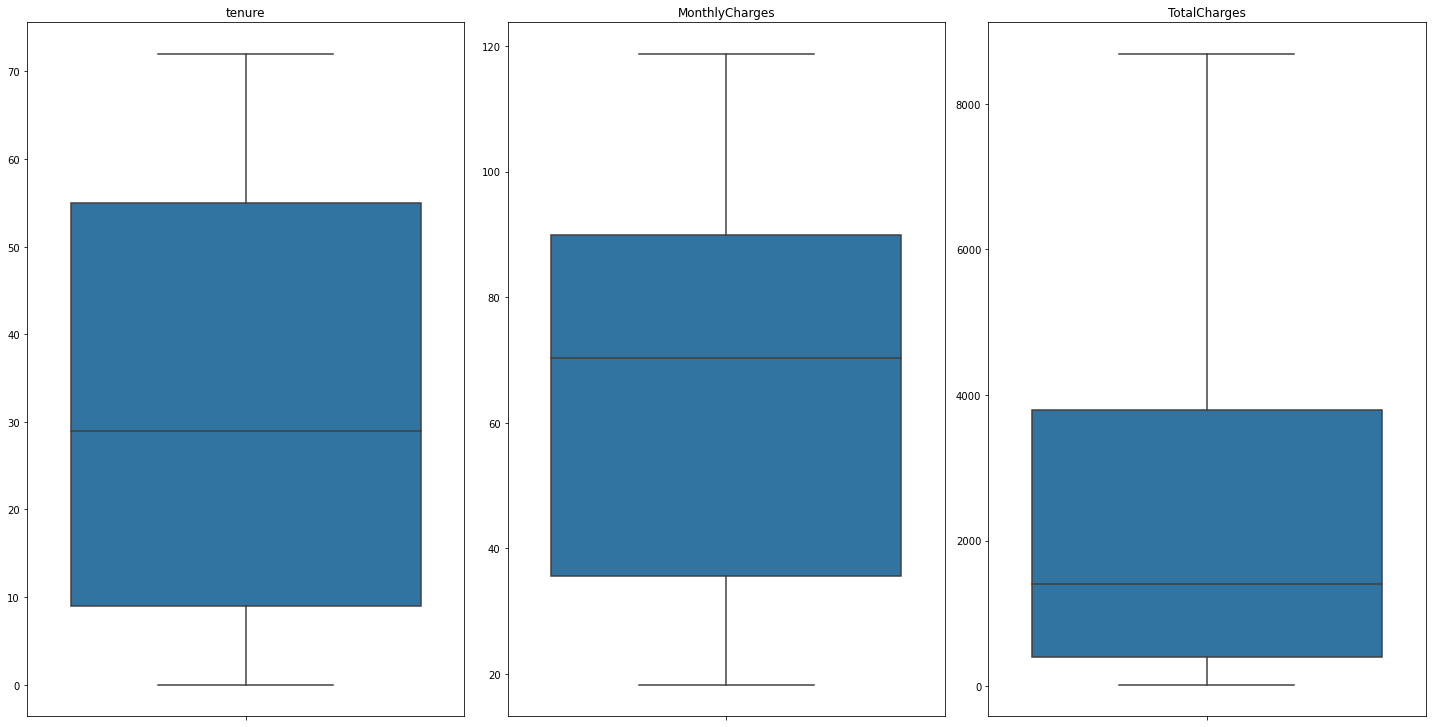

In [20]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        y = df[num_cols[i]]
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

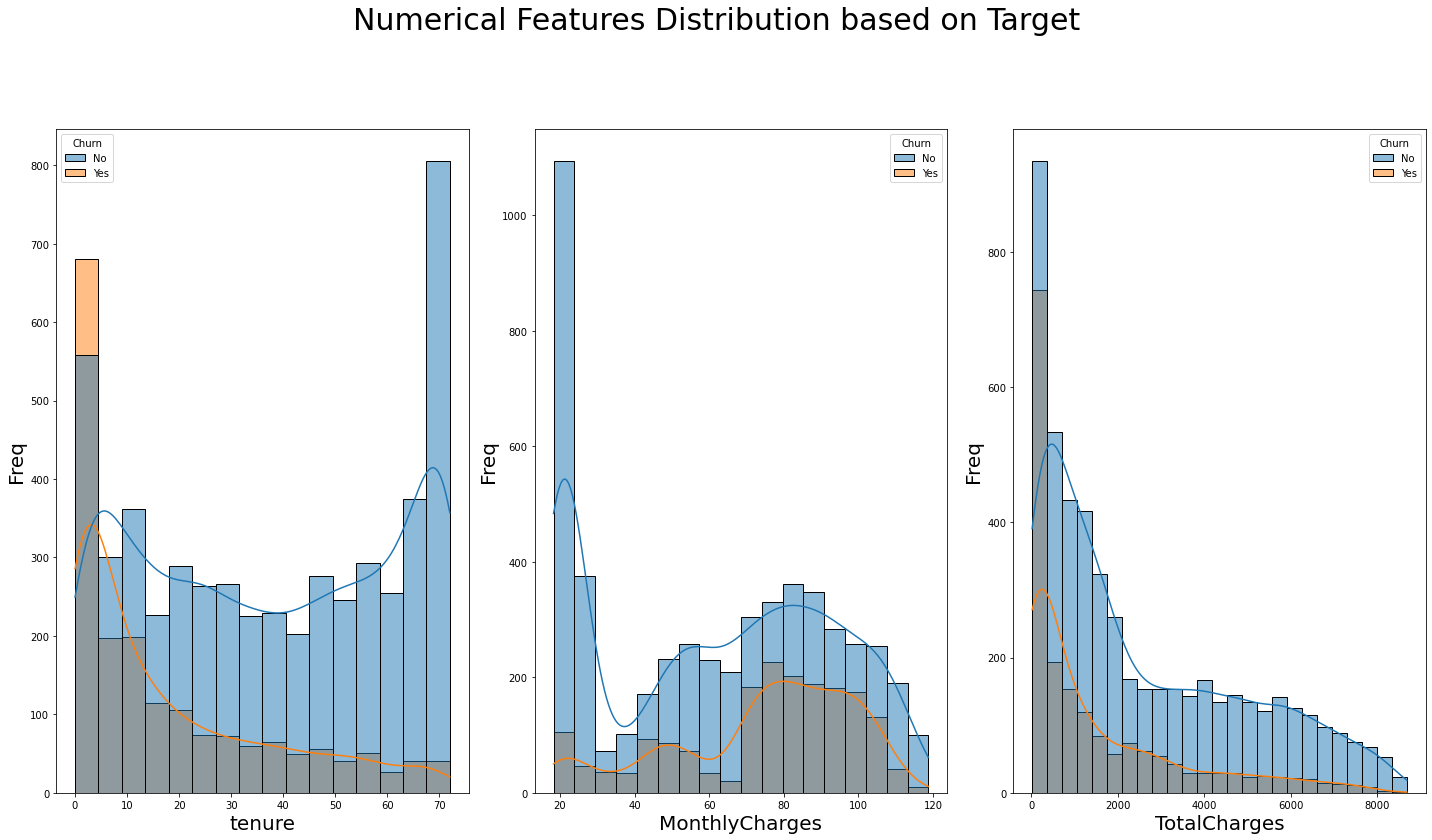

In [21]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.05)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.histplot(
        x = df[num_cols[i]],
        kde = True,
        hue = df['Churn'],
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
plt.tight_layout()
plt.show()

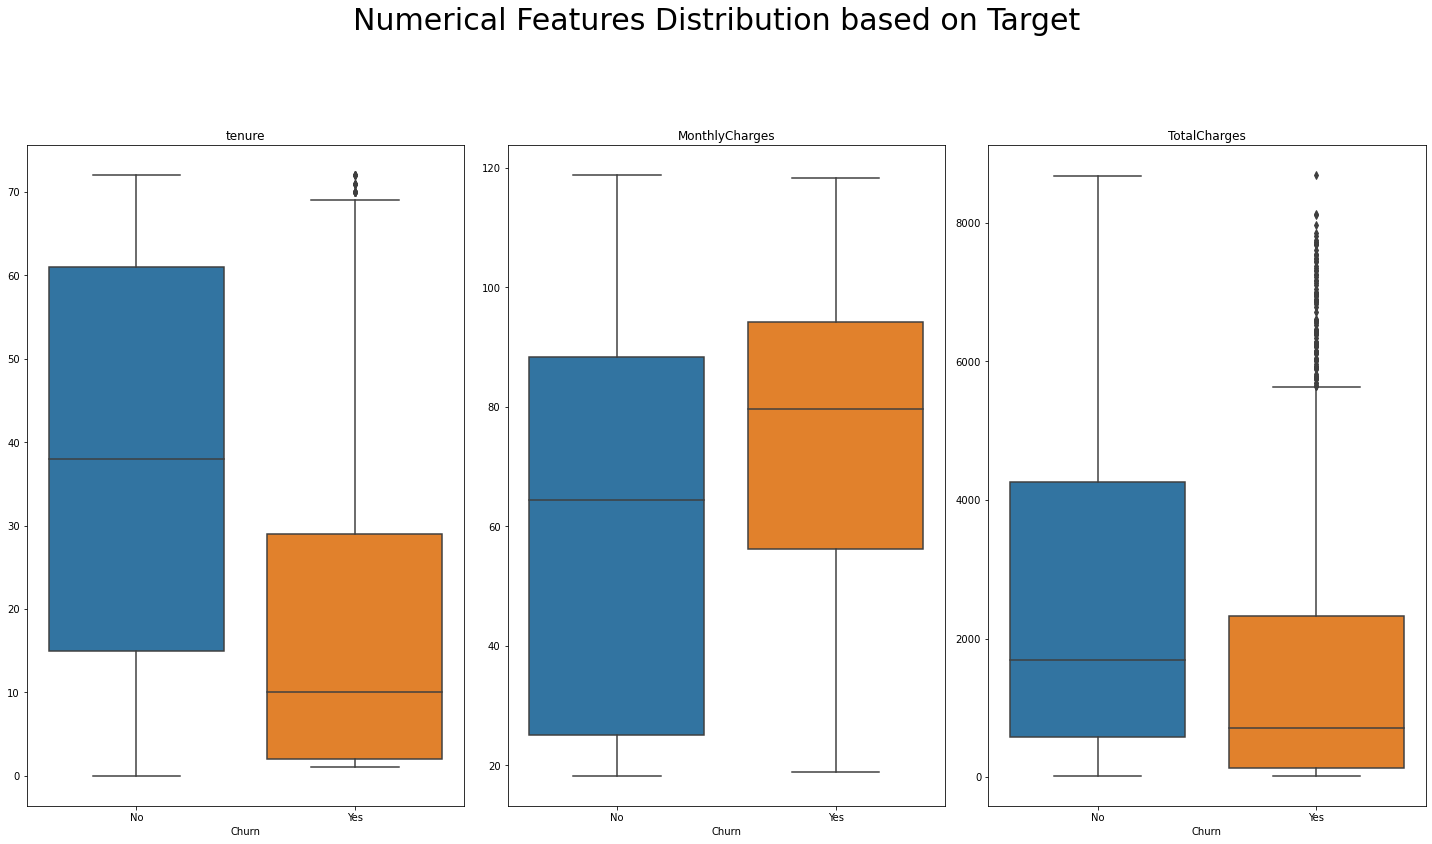

In [22]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.05)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        y = df[num_cols[i]],
        x = df['Churn']
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

In [23]:
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [24]:
cat_cols.remove('customerID')
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

/var/folders/s9/lm5cmhx55cj8lf8xt4tlk5580000gn/T/ipykernel_88007/3730519217.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(cat_cols)/2+1,2,i+1)
/var/folders/s9/lm5cmhx55cj8lf8xt4tlk5580000gn/T/ipykernel_88007/3730519217.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(cat_cols)/2+1,2,i+1)
/var/folders/s9/lm5cmhx55cj8lf8xt4tlk5580000gn/T/ipykernel_88007/3730519217.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(cat_cols)/2+1,2,i+1)
/var/folders/s9/lm5cmhx55cj8lf8xt4tlk5580000gn/T/ipykernel_88007/3730519217.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element posi

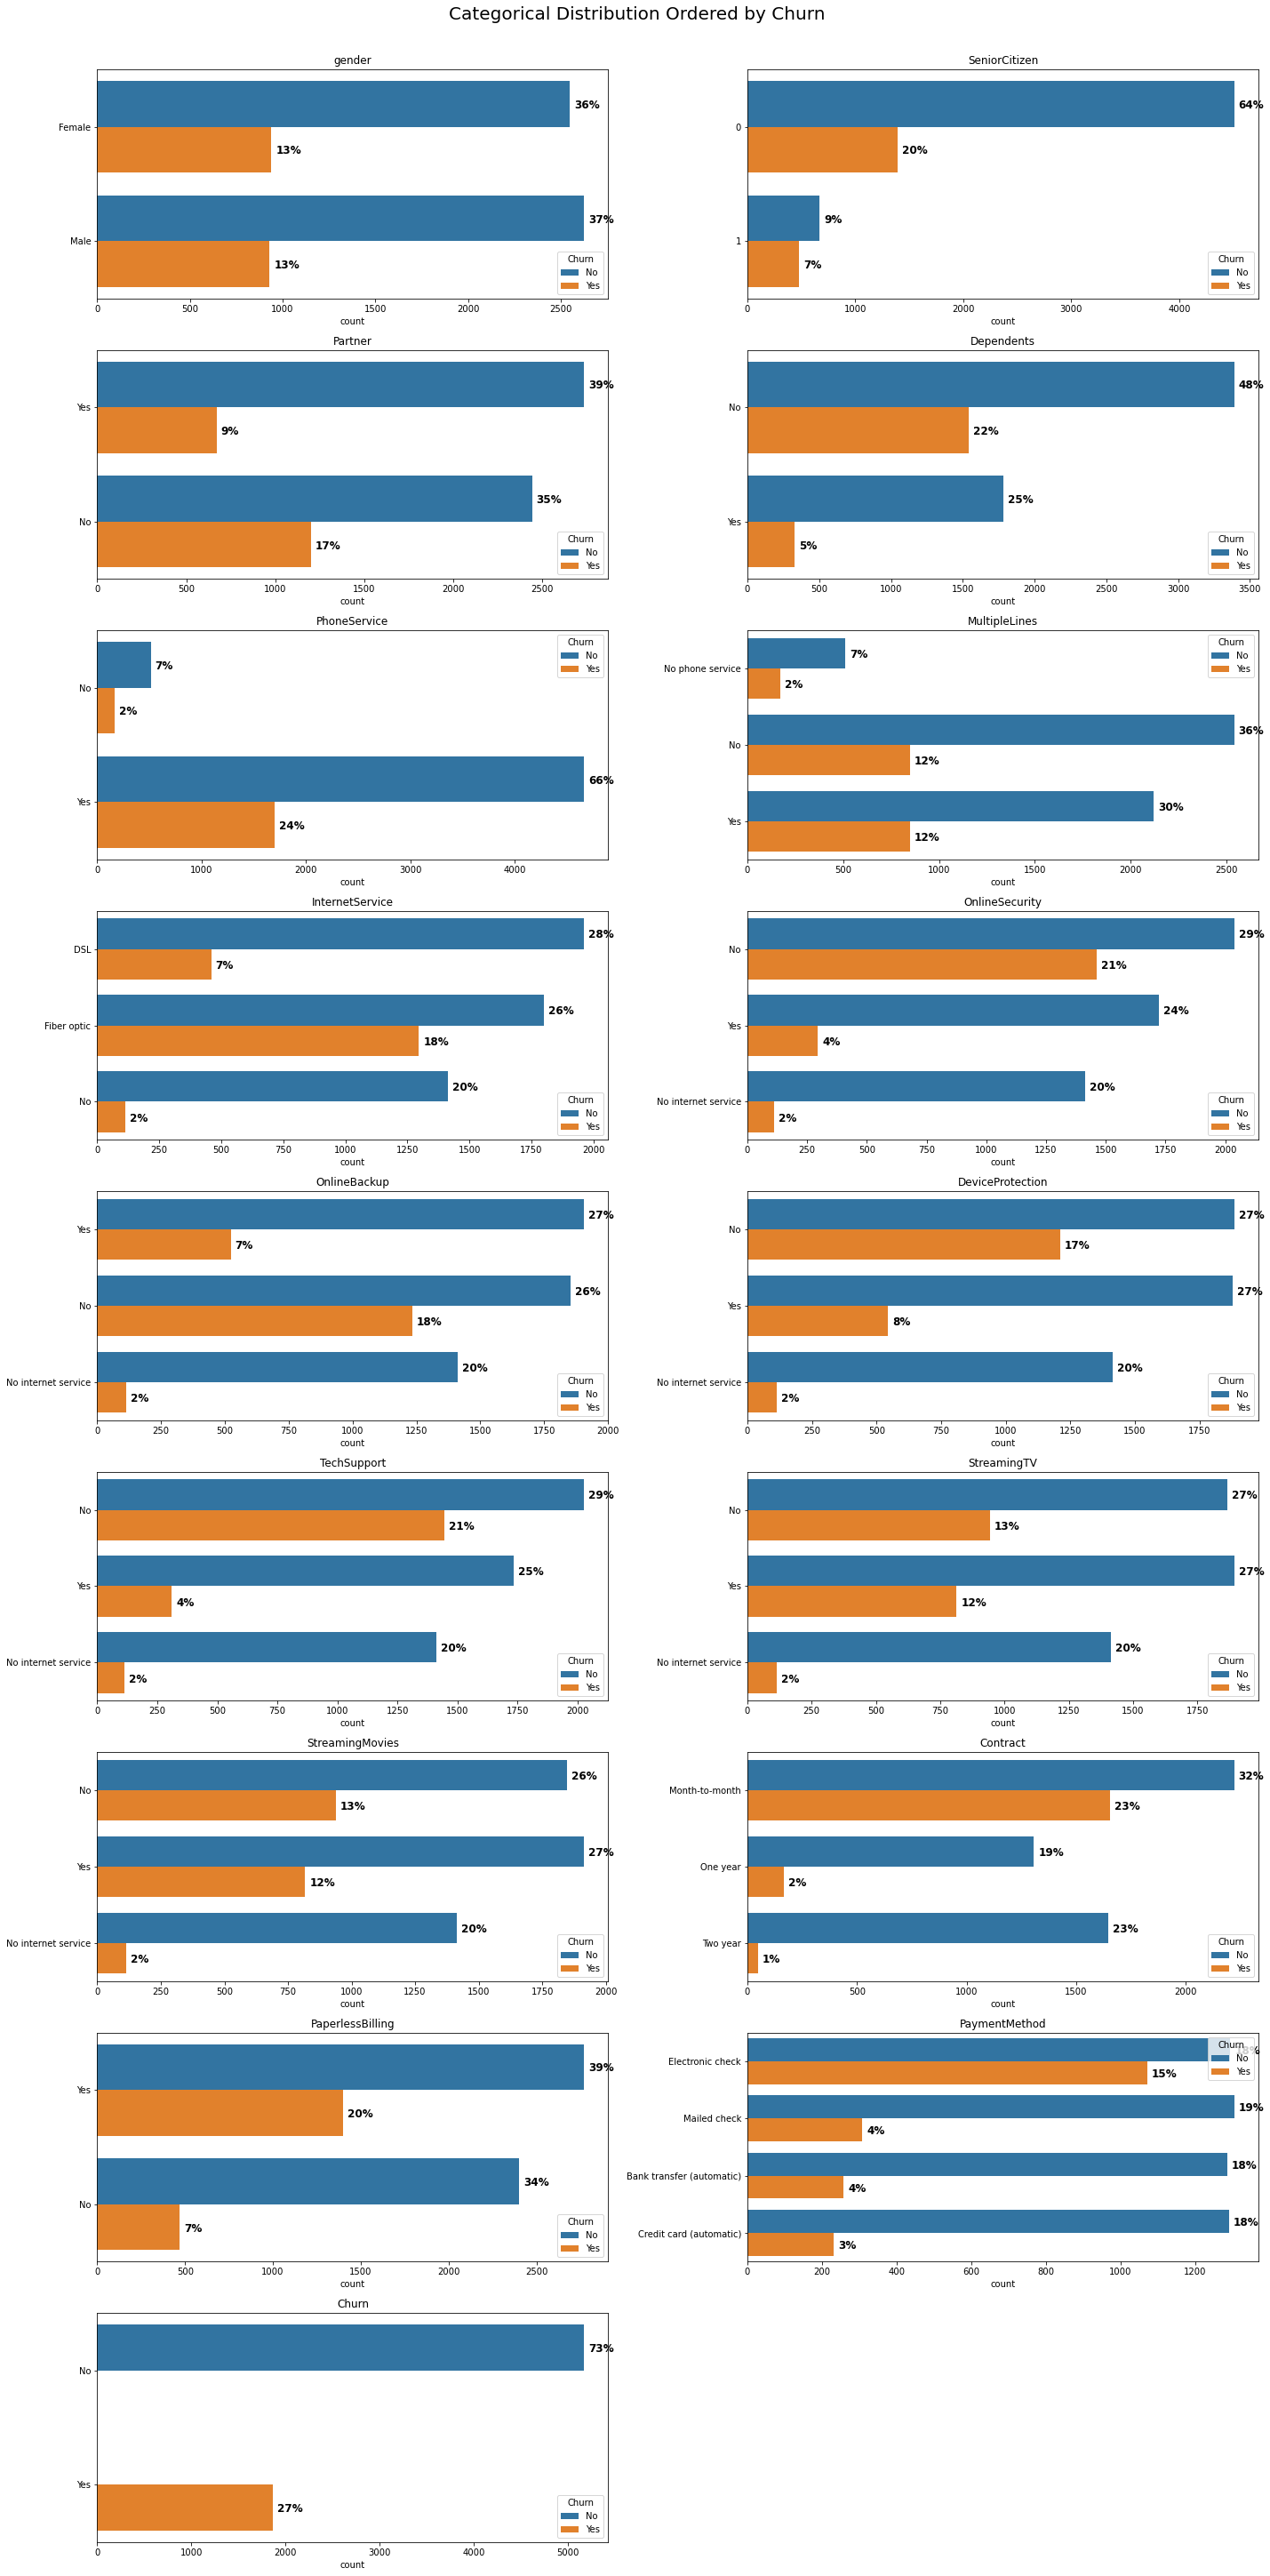

In [25]:
plt.figure(figsize=(20,40))
plt.suptitle('Categorical Distribution Ordered by Churn',fontsize=20, y=1.005)
for i in range (len(cat_cols)):
  plt.subplot(len(cat_cols)/2+1,2,i+1)
  ax = sns.countplot(y=df[cat_cols[i]],hue = df['Churn'])
  ax.set_title(cat_cols[i])
  ax.set_ylabel('')
  for p in ax.patches:
        ax.annotate(
            format(p.get_width()*100/len(df), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'black', fontsize=12
        )
  
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

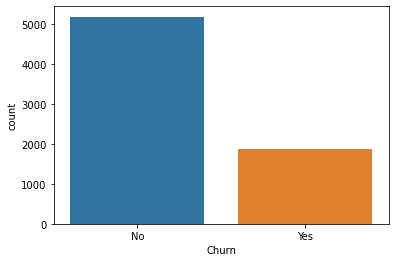

In [26]:
sns.countplot(x=df['Churn'])

<p>Churn Value Count</p>
*From the count value, the yes event is smaller than no event.*
<br>
<p>Target by Gender</p>
*The Churn count by gender, is balanced between the female and male, either the yes nor no event.*

<p>Target by SeniorCitizen</p> 
*The 0 value is for No and 1 is for yes. For the older citizen, there is a slightly balanced value between churn and not churned. But, the old customer who not churned is more than who churned.*

<p>Target by Partner</p>
*The customer who doesn't have partner, has more churned value than customer who have partner*

<p> Target by Dependents</p>
*Churn value on the customer who doesn't have dependants is more than customer who don't have dependants*

<p>Target by Phone Service</p>
*Customer who has phone service is have more not churn value*

<p>Target by MultipleLines</p>
*Customers of multiple telephone line is slightly higher in percentage of churn, although the number is slightly the same with users of single line*

<p>Target by Internet service</p>
*Consumer who has internet service (DSL and Fiber Optic) has higher percentage of churn rather than customer who doesn't have internet service*

<p>Target by Contract and Payment Method</p>
*Customer who pay billing month to month and payment method of electronic check has the higher percentage of churn* 

In [27]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## *Model Pre Processing*

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df_new = df
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df_new.drop(['customerID','PaperlessBilling'],axis=1,inplace=True)
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [31]:
num_cols_new = df_new.select_dtypes(exclude=  ['object']).columns.tolist()
cat_cols_new  = df_new.select_dtypes(include = ['object']).columns.tolist()
print(num_cols_new)
print(cat_cols_new)

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn']


In [32]:
X = df_new.drop('Churn',axis=1)
y= df_new['Churn']

In [33]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check,74.40,306.60


In [34]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

In [35]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [36]:
print(df.shape)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7043, 19)
(5634, 18)
(5634,)
(704, 18)
(704,)
(705, 18)
(705,)


(None, None)

## Pipelines

In [37]:
cat_cols_new.remove('Churn')

In [38]:
cat_cols_new

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [39]:
num_cols_new

['tenure', 'MonthlyCharges', 'TotalCharges']

In [40]:
numeric_features = num_cols_new
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [41]:
categorical_features = cat_cols_new
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [42]:
#column_trans = make_column_transformer(
#    (SimpleImputer(strategy='mean',fill_value = np.NaN),num_cols_new),
#    (OneHotEncoder(),cat_cols_new),
#    (StandardScaler(),num_cols_new),
#    remainder='passthrough')

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [44]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomForestClassifier(random_state=42))])

In [45]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_valid, y_valid))

model score: 0.776


In [46]:
clf.steps[1][1].feature_importances_

array([0.14592314, 0.14522682, 0.16832725, 0.01785361, 0.01928322,
       0.01374057, 0.01278853, 0.01591853, 0.01495632, 0.01252726,
       0.01294841, 0.00282749, 0.00267706, 0.01348728, 0.00279254,
       0.01363186, 0.01263534, 0.02230733, 0.00412911, 0.03946695,
       0.00134018, 0.00984722, 0.01813675, 0.00268472, 0.01255624,
       0.0153173 , 0.00171195, 0.01246798, 0.02017135, 0.00282405,
       0.01198336, 0.01157184, 0.00342283, 0.01112485, 0.0119725 ,
       0.00228549, 0.01198456, 0.05188926, 0.01020333, 0.01743738,
       0.01220764, 0.01286193, 0.0291544 , 0.01139432])

## Feature Selection with Random Forest

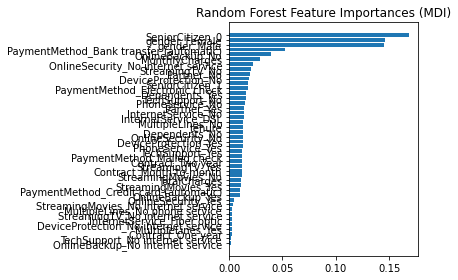

<Figure size 720x2160 with 0 Axes>

In [47]:
ohe = (clf.named_steps['preprocessor']
         .named_transformers_['cat'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (
    clf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.figure(figsize=(10,30))
plt.show()

In [48]:
sorted_idx

array([20, 26, 35, 12, 23, 14, 29, 11, 32, 18, 21, 38, 33, 43, 31, 34, 30,
       36, 40, 27,  9, 24, 16,  6, 41, 10, 13, 15,  5,  8, 25,  7, 39,  3,
       22,  4, 28, 17, 42, 19, 37,  1,  0,  2])

In [49]:
d = {'Feature names': feature_names[sorted_idx], 'Score': tree_feature_importances[sorted_idx]}
rf_fi = pd.DataFrame(data=d)
rf_fi
#rf_fi = pd.Dataframe('Feature names':[feature_names],'Score':[sorted_idx])
#rf_fi

,Feature names,Score
0,OnlineBackup_No internet service,0.001340
1,TechSupport_No internet service,0.001712
2,Contract_One year,0.002285
3,MultipleLines_Yes,0.002677
4,DeviceProtection_No internet service,0.002685
5,InternetService_Fiber optic,0.002793
6,StreamingTV_No internet service,0.002824
7,MultipleLines_No phone service,0.002827
8,StreamingMovies_No internet service,0.003423
9,OnlineSecurity_Yes,0.004129


**Features that selected by random forest by highest value
'SeniorCitizen','gender','PaymentMethod','OnlineBackup','MonthlyCharges','OnlineSecurity','StreamingTV', and 'DeviceProtection'**

In [50]:
features_selected = ['SeniorCitizen','gender','PaymentMethod','OnlineBackup','MonthlyCharges','OnlineSecurity','StreamingTV','DeviceProtection','Churn']

In [51]:
df_select = df_new[features_selected]
df_select.head()

,SeniorCitizen,gender,PaymentMethod,OnlineBackup,MonthlyCharges,OnlineSecurity,StreamingTV,DeviceProtection,Churn
0,0,Female,Electronic check,Yes,29.85,No,No,No,No
1,0,Male,Mailed check,No,56.95,Yes,No,Yes,No
2,0,Male,Mailed check,Yes,53.85,Yes,No,No,Yes
3,0,Male,Bank transfer (automatic),No,42.30,Yes,No,Yes,No
4,0,Female,Electronic check,No,70.70,No,No,No,Yes


In [52]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   object 
 1   gender            7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   OnlineBackup      7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   OnlineSecurity    7043 non-null   object 
 6   StreamingTV       7043 non-null   object 
 7   DeviceProtection  7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), object(8)
memory usage: 495.3+ KB


In [53]:
X1 =df_select.drop('Churn',axis=1)
y1= df_select['Churn']

In [54]:
X1_train, X1_rem, y1_train, y1_rem = train_test_split(X1,y1, train_size=0.8)

In [55]:
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_rem,y1_rem, test_size=0.5)

In [56]:
print(df_select.shape)
print(X1_train.shape), print(y1_train.shape)
print(X1_val.shape), print(y1_val.shape)
print(X1_test.shape), print(y1_test.shape)

(7043, 9)
(5634, 8)
(5634,)
(704, 8)
(704,)
(705, 8)
(705,)


(None, None)

In [57]:
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [58]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['MonthlyCharges']),
        ('cat', categorical_transformer, ['SeniorCitizen','gender','PaymentMethod','OnlineBackup','OnlineSecurity','StreamingTV','DeviceProtection'])])

# ANN 

In [125]:
from keras.models import Sequential
from keras.layers.core import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [60]:
tf.keras.backend.clear_session()

In [126]:
X1_train.shape

(5634, 8)

In [127]:
Input_Shape = X1_train.shape[1]

In [128]:
Input_Shape

8

Make ANN model

In [155]:
def create_model(optimizer='adam',
                 kernel_initializer='glorot_uniform', 
                 dropout=0.2):
    model_krs = Sequential([
                        keras.layers.Dense(25, input_shape=(21,),activation='relu'),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dropout(0.3),
                        keras.layers.Dense(1, activation='sigmoid')
])

    model_krs.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

    return model_krs

In [156]:
#model_krs.summary()

Tensorflow wrappers to scikitlearn

In [157]:
clf_tf = KerasClassifier(build_fn=create_model,verbose=0)

#scaler = StandardScaler()

Grid Search to find best hyperparameter

In [161]:
param_grid = {
    'clf__optimizer':['rmsprop','adam','adagrad'],
    'clf__epochs':[4,8],
    'clf__batch_size':[4,8],
    'clf__dropout':[0.1,0.2,0.3],
    'clf__kernel_initializer':['glorot_uniform','normal','uniform']
}

pipeline = Pipeline([
    ('preprocessor', preprocessor2),
    ('clf',clf_tf)
])

#pipeline.fit(X1_train,y1_train)
# if you're not using a GPU, you can set n_jobs to something other than 1
grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid, n_jobs=-1)
grid.fit(X1_train, y1_train)
%time
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
print('')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Graph Optimizer
Init Graph Optimizer
Init Graph Optimizer
Init Kernel
Init Kernel
Init Kernel
Init Graph Optimizer
Init Kernel
Init Graph Optimizer
Init Kernel
Init Graph Optimizer
Init Graph Optimizer
Init Graph Optimizer
Init Kernel
Init Kernel
Init Kernel
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1


2021-08-31 04:07:25.279304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-31 04:07:25.279297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-31 04:07:25.279304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-31 04:07:25.279852: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-31 04:07:25.280173: I tensorflow/core/common_runtime/plu

2021-08-31 04:07:41.977552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:07:42.141388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:07:42.215829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/mini

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

2021-08-31 04:09:56.030642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:09:56.955146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:09:59.059933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:09:59.497589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:10:30.237408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:10:33.729118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:10:42.682406: I tensorflow/core/grappler/optimizers/cust

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

2021-08-31 04:12:04.422266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return supe

2021-08-31 04:12:12.208653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:12:15.264729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:14:50.368102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:14:52.137131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:14:53.640788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:15:02.872714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:15:04.071282: I tensorflow/core/grappler/optimizers/cust

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

2021-08-31 04:18:22.465720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:18:56.228417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:18:59.365222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:19:10.398894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:19:12.425684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:19:30.896591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:19:32.500788: I tensorflow/core/grappler/optimizers/cust

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

2021-08-31 04:21:32.028909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:21:33.213275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:21:46.381833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:22:26.360720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:22:27.910000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:22:32.681877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:22:32.698035: I tensorflow/core/grappler/optimizers/cust

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

2021-08-31 04:24:23.861938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:24:29.203563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:24:42.519932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:26:36.062641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:26:42.070015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:26:47.507464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:26:47.704358: I tensorflow/core/grappler/optimizers/cust

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

2021-08-31 04:29:57.370576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:30:46.049515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:31:00.623536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:31:14.078852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:31:27.113925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:31:32.706212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:31:46.796340: I tensorflow/core/grappler/optimizers/cust

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

2021-08-31 04:33:39.257564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:33:39.268701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:34:28.831801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:34:29.356364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:34:30.368839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:34:31.932560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:34:39.100906: I tensorflow/core/grappler/optimizers/cust

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

2021-08-31 04:36:20.613516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:36:33.818210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:36:45.748375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:38:28.418110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:38:41.100850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:38:50.560975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-31 04:38:52.270736: I tensorflow/core/grappler/optimizers/cust

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 220, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/wrappers/sciki

KeyboardInterrupt: 

 best hyperparameter : {'clf__dropout': 0.1, 'clf__epochs': 8, 'clf__kernel_initializer': 'uniform', 'clf__optimizer': 'rmsprop'}

**Make new model**

In [ ]:
def create_model2(optimizer='rmsprop',
                 kernel_initializer='uniform', 
                 dropout=0.1):
    model_krs2 = Sequential([
                        keras.layers.Dense(25, input_shape=(21,),activation='relu'),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dropout(0.3),
                        keras.layers.Dense(1, activation='sigmoid')
])

    model_krs2.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

    return model_krs2

In [ ]:
create_model2

In [ ]:
#model_krs2.summary()

In [ ]:
clf_tf2 = KerasClassifier(build_fn=create_model2,verbose=0,epochs=8)

In [137]:
features_selected.remove('Churn')
features_selected

['SeniorCitizen',
 'gender',
 'PaymentMethod',
 'OnlineBackup',
 'MonthlyCharges',
 'OnlineSecurity',
 'StreamingTV',
 'DeviceProtection']

**Pipeline for new model with best hyperparameter**

In [138]:
pipeline2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('clf',clf_tf2)
])

In [139]:
pipeline2.fit(X1_train,y1_train)

2021-08-31 03:56:56.402620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SeniorCitizen', 'gender',
                                                   'PaymentMethod',
                                                   'OnlineBackup',
                                                   'OnlineSecurity',
                                                   'StreamingTV',

**Predict model**

In [140]:
y1_pred = pipeline2.predict(X1_val)
y1_pred

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-08-31 03:57:06.994825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
 

In [ ]:
pipeline2.steps[1]

# ANN 2

Make ANN model by only using Keras

In [106]:
from keras.models import Sequential
from keras.layers.core import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [107]:
tf.keras.backend.clear_session()

In [108]:
df_select

,SeniorCitizen,gender,PaymentMethod,OnlineBackup,MonthlyCharges,OnlineSecurity,StreamingTV,DeviceProtection,Churn
0,0,Female,Electronic check,Yes,29.85,No,No,No,No
1,0,Male,Mailed check,No,56.95,Yes,No,Yes,No
2,0,Male,Mailed check,Yes,53.85,Yes,No,No,Yes
3,0,Male,Bank transfer (automatic),No,42.30,Yes,No,Yes,No
4,0,Female,Electronic check,No,70.70,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...
7038,0,Male,Mailed check,No,84.80,Yes,Yes,Yes,No
7039,0,Female,Credit card (automatic),Yes,103.20,No,Yes,Yes,No
7040,0,Female,Electronic check,No,29.60,Yes,No,No,No
7041,1,Male,Mailed check,No,74.40,No,No,No,Yes


In [109]:
X2= pd.get_dummies(df_select.drop(['Churn'],axis=1))
y2=df_select['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [110]:
X2_train, X2_rem ,y2_train,y2_rem = train_test_split(X2,y2,test_size=0.1)

In [111]:
X2_val,X2_test,y2_val,y2_test = train_test_split(X2_rem,y2_rem,train_size=2/7)

In [112]:
X2_train.head()

,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,...,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
6995,89.55,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4952,100.20,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
1274,101.15,1,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
4722,70.15,1,0,1,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
6196,110.05,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [113]:
y2_train.head()

6995    0
4952    0
1274    0
4722    0
6196    0
Name: Churn, dtype: int64

In [114]:
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

In [115]:
model_krs3 = Sequential([
                        keras.layers.Dense(25, input_shape=(21,),activation='relu'),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dropout(0.3),
                        keras.layers.Dense(1, activation='sigmoid')
])

In [116]:
model_krs3.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics='accuracy')

In [117]:
%%time 
hist1 = model_krs3.fit(X2_train,y2_train,epochs=100,batch_size=12,validation_data=(X2_val,y2_val),callbacks=[EarlyStopping])

Epoch 1/100
  7/529 [..............................] - ETA: 4s - loss: 1.0880 - accuracy: 0.3941  

2021-08-31 01:36:09.081486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


529/529 [==============================] - 5s 9ms/step - loss: 0.6275 - accuracy: 0.6864 - val_loss: 0.4909 - val_accuracy: 0.7960
Epoch 2/100
 14/529 [..............................] - ETA: 4s - loss: 0.5547 - accuracy: 0.7861

2021-08-31 01:36:13.625986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


529/529 [==============================] - 4s 8ms/step - loss: 0.5312 - accuracy: 0.7402 - val_loss: 0.4783 - val_accuracy: 0.7861
Epoch 3/100
529/529 [==============================] - 4s 8ms/step - loss: 0.5250 - accuracy: 0.7435 - val_loss: 0.4852 - val_accuracy: 0.7910
Epoch 4/100
529/529 [==============================] - 4s 8ms/step - loss: 0.5143 - accuracy: 0.7460 - val_loss: 0.4670 - val_accuracy: 0.7910
Epoch 5/100
529/529 [==============================] - 5s 9ms/step - loss: 0.5032 - accuracy: 0.7637 - val_loss: 0.4661 - val_accuracy: 0.7960
Epoch 6/100
529/529 [==============================] - 5s 9ms/step - loss: 0.5030 - accuracy: 0.7604 - val_loss: 0.4887 - val_accuracy: 0.7512
Epoch 7/100
529/529 [==============================] - 4s 8ms/step - loss: 0.5082 - accuracy: 0.7516 - val_loss: 0.4813 - val_accuracy: 0.7910
Epoch 8/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4983 - accuracy: 0.7643 - val_loss: 0.4846 - val_accuracy: 0.7662
Epoch 9/100

In [118]:
%%time 
hist2 = model_krs3.fit(X2_train,y2_train,epochs=100,batch_size=12,validation_data=(X2_val,y2_val),callbacks=[EarlyStopping])

Epoch 1/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4925 - accuracy: 0.7600 - val_loss: 0.4598 - val_accuracy: 0.8060
Epoch 2/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4931 - accuracy: 0.7578 - val_loss: 0.4689 - val_accuracy: 0.7960
Epoch 3/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4937 - accuracy: 0.7545 - val_loss: 0.4608 - val_accuracy: 0.8060
Epoch 4/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4942 - accuracy: 0.7548 - val_loss: 0.4851 - val_accuracy: 0.7960
Epoch 5/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4954 - accuracy: 0.7586 - val_loss: 0.4685 - val_accuracy: 0.7910
Epoch 6/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4963 - accuracy: 0.7547 - val_loss: 0.4621 - val_accuracy: 0.8010
Epoch 00006: early stopping
CPU times: user 25.9 s, sys: 16.9 s, total: 42.8 s
Wall time: 26.4 s


In [119]:
%%time 
hist3 = model_krs3.fit(X2_train,y2_train,epochs=100,batch_size=12,validation_data=(X2_val,y2_val),callbacks=[EarlyStopping])

Epoch 1/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4932 - accuracy: 0.7614 - val_loss: 0.4619 - val_accuracy: 0.7960
Epoch 2/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4953 - accuracy: 0.7561 - val_loss: 0.4667 - val_accuracy: 0.8010
Epoch 3/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4918 - accuracy: 0.7619 - val_loss: 0.4551 - val_accuracy: 0.8109
Epoch 4/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4946 - accuracy: 0.7594 - val_loss: 0.4568 - val_accuracy: 0.8159
Epoch 5/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4942 - accuracy: 0.7551 - val_loss: 0.4617 - val_accuracy: 0.8010
Epoch 6/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4930 - accuracy: 0.7589 - val_loss: 0.4645 - val_accuracy: 0.7960
Epoch 7/100
529/529 [==============================] - 4s 8ms/step - loss: 0.4904 - accuracy: 0.7581 - val_loss: 0.4546 - val_accuracy: 0.8060

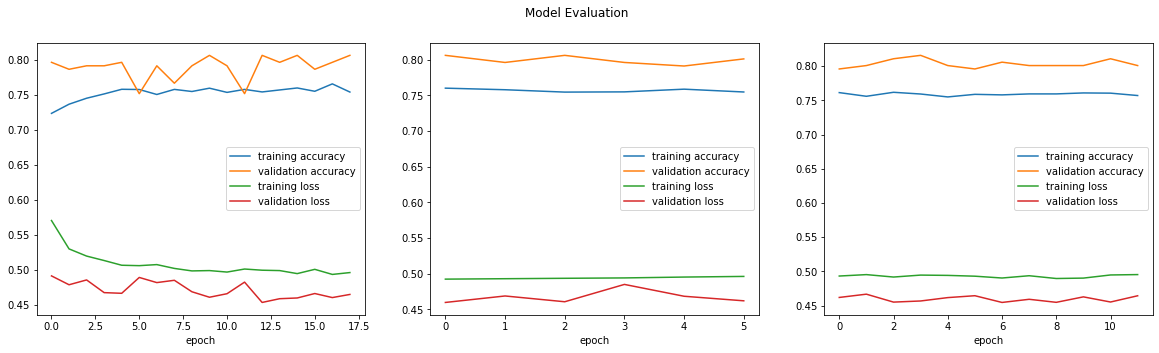

In [120]:
plt.figure(figsize=(20,5))
plt.suptitle('Model Evaluation')
for i, j in zip([hist1,hist2,hist3],[1,2,3]):
    plt.subplot(1,3,j)
    plt.plot(i.history['accuracy'], label='training accuracy')
    plt.plot(i.history['val_accuracy'], label='validation accuracy')
    plt.plot(i.history['loss'], label='training loss')
    plt.plot(i.history['val_loss'], label='validation loss')
    plt.xlabel('epoch')
    plt.legend(loc='best')
plt.show()

In [121]:
model_krs3.evaluate(X2_train,y2_train,batch_size=12)

529/529 [==============================] - 2s 3ms/step - loss: 0.4861 - accuracy: 0.7684


[0.4861418902873993, 0.7683812379837036]

In [153]:
pred = model_krs3.predict(X2_test)
pred = ['Staying' if val < 0.5 else 'Churn' for val in pred]

In [154]:
pred

['Staying',
 'Staying',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Churn',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Churn',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Churn',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Staying',
 'Stayin

# Model Inference

In [123]:
X_inf_A = np.array([[61.45,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0]])
X_inf_B = np.array([[100.00,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	1,	0]])

In [124]:
for n in [X_inf_A,X_inf_B]:
    res = model_krs3.predict(n)
    if res < 0.5:
        print('Staying')
    else:
        print('Churn')

Staying
Staying


2021-08-31 01:38:48.677437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


**Model Saving**

In [ ]:
model_krs3.save('ann-p2m1-abyanandi.h5')

In [ ]:
!mkdir -p saved_model
model_krs3.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


## Conclusion

***EDA***
<Br>
From the EDA, subscription plan is stable on long-time customers, not by elderlies but customer who has married or by dependents.
Monthly contracts makes customer can stop their subscription whenever they want. Nearly 40% of monthly contracts failed and 50% of customers options used monthly contracts, and that explained the high value of churn.

After doing feature selection using random forest, column that are selected to be used in ANN model is 'SeniorCitizen','gender','PaymentMethod','OnlineBackup','MonthlyCharges','OnlineSecurity','StreamingTV', and 'DeviceProtection'
</Br>

**Model Analysis**
<Br>
Training results of our model shows an accuracy score of 75% and the validation accuracy is around around 78-81%. When using the model to predict churn, it'd be good to compare the result with the features of importance. This serves as a validation to the result and also becomes a point to improve, mainly in the services included as important features.